<a href="https://colab.research.google.com/github/JoseManuel1007/Proyecto3/blob/main/Predicci%C3%B3n_mercado_energ%C3%A9tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
pip install pydataxm

In [29]:
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM

In [30]:
# Importación
from pydataxm.pydatasimem import CatalogSIMEM

# Crear una instancia de catalogo con el tipo
catalogo_conjuntos = CatalogSIMEM('Datasets')

# Extraer información a utilizar
print("Nombre: ", catalogo_conjuntos.get_name())
print("Metadata: ", catalogo_conjuntos.get_metadata())
print("Columnas: ", catalogo_conjuntos.get_columns())

#  Dataframe con información de los conjuntos de datos
data = catalogo_conjuntos.get_data()
print(data)

Nombre:  Catálogo de Datos y API
Metadata:                                           description         creationDate  \
0  Contiene la descripción de los conjuntos de da...  2023-11-16 07:30:06   

            lastUpdate nextUpdateDate entity category periodicity granularity  \
0  2025-11-08 03:59:47      11/8/2025  SIMEM       NA      Diaria          NA   

  historicData  private ultimaNovedad  
0           NA    False          None  
Columnas:              nameColumn    dataType  \
0            IdDataset       texto   
1  NombreConjuntoDatos       texto   
2     FechaPublicacion       fecha   
3   FechaActualizacion  fecha hora   
4           InicioDato       fecha   
5              FinDato       fecha   
6        FechaDescarga  fecha hora   
7       URLConexionAPI       texto   
8     URLConjuntoDatos       texto   
9      TipoPublicacion       texto   

                                         description  
0          Identificador único del conjunto de datos  
1                 

In [31]:
from pydataxm.pydataxm import ReadDB

In [32]:
# Importación
from pydataxm.pydatasimem import ReadSIMEM, CatalogSIMEM

# Buscar el id del conjunto de datos
catalogo = CatalogSIMEM('Datasets')
data_catalogo = catalogo.get_data()
print(data_catalogo.query("nombreConjuntoDatos.str.contains('Generación Real')"))

# Crear una instancia de ReadSIMEM
dataset_id = '96D56E'
fecha_inicio = '2024-01-01'
fecha_fin = '2024-12-31'
generacion = ReadSIMEM(dataset_id, fecha_inicio, fecha_fin)

# Recuperar datos
data = generacion.main(filter=False)
print(data)

    idDataset                                nombreConjuntoDatos  \
352    E17D25  Generación Real y Programada en las Plantas de...   

           fechaPublicacion      fechaActualizacion           inicioDato  \
352  2023-09-29T10:59:40.38  2025-11-07T16:33:03.92  2013-01-01T00:00:00   

                 finDato           fechaDescarga  \
352  2025-11-06T00:00:00  2025-04-23T15:45:51.61   

                                        urlConexionAPI  \
352  https://www.simem.coPublicData?startDate=2025-...   

                                      urlConjuntoDatos tipoPublicacion  
352  https://www.simem.co/datadetail/e17d259d-ffba-...         Público  
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precio de bolsa ponderado"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0

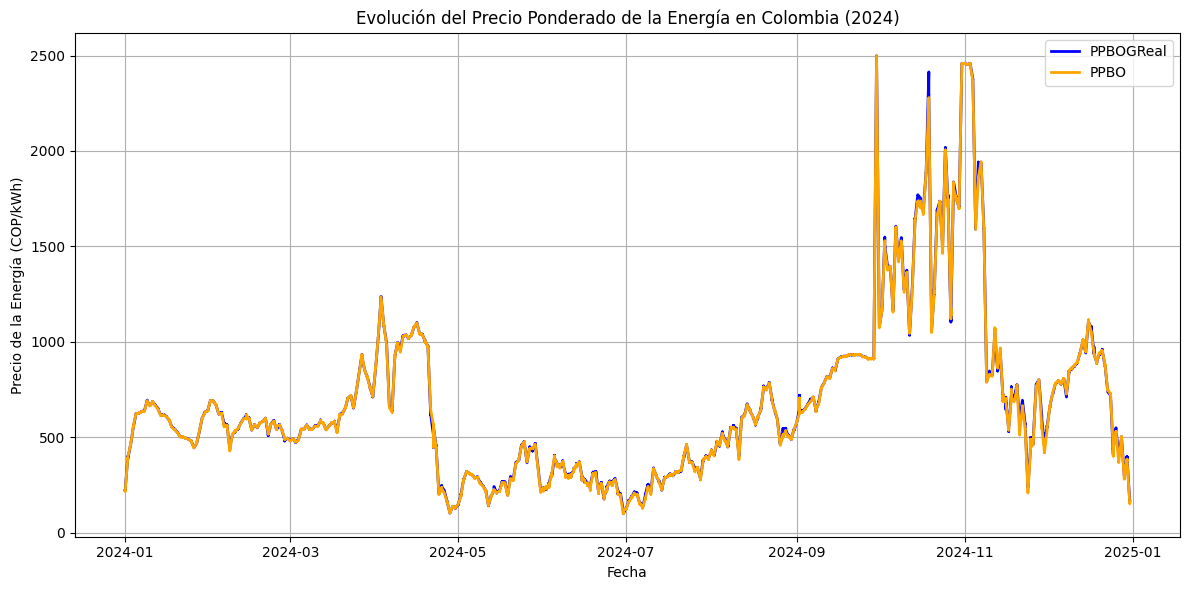

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna de fecha al formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Ordenar los registros de forma ascendente por fecha
data = data.sort_values(by='Fecha')

# Eliminar valores atípicos del 30 de septiembre de 2024 con precios mayores a 7000
data_filtrada = data[~(
    (data['Fecha'] == '2024-09-30') & (data['Valor'] > 7000)
)]

# Filtrar las variables de interés
ppbogreal = data_filtrada[data_filtrada['CodigoVariable'] == 'PPBOGReal']
ppbo = data_filtrada[data_filtrada['CodigoVariable'] == 'PPBO']

# Gráfico de los precios ponderados de la energía
plt.figure(figsize=(12, 6))
plt.plot(ppbogreal['Fecha'], ppbogreal['Valor'], label='PPBOGReal', color='blue', linewidth=2)
plt.plot(ppbo['Fecha'], ppbo['Valor'], label='PPBO', color='orange', linewidth=2)

# Etiquetas y formato del gráfico
plt.title('Evolución del Precio Ponderado de la Energía en Colombia (2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio de la Energía (COP/kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Selecciona el archivo CSV con los precios spot de Alemania y Francia:


Saving european_wholesale_electricity_price_data_daily.csv to european_wholesale_electricity_price_data_daily (1).csv
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precio de bolsa ponderado"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007665157318115234
Extraccion de registros: 53.66526246070862
End of data extracting process
****************************************************************************************************


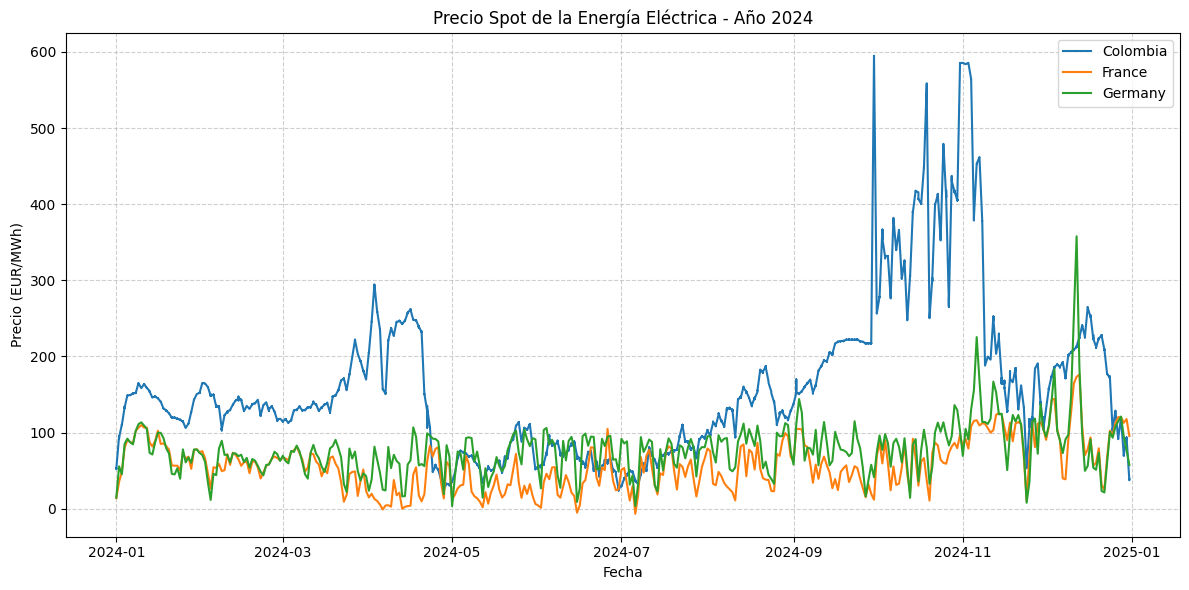

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataxm.pydatasimem import ReadSIMEM
from google.colab import files

# 1. Subir archivo CSV con los precios de Alemania y Francia
print("Selecciona el archivo CSV con los precios spot de Alemania y Francia:")
uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df_europa = pd.read_csv(csv_filename)

# Asegurar formato correcto
df_europa['Date'] = pd.to_datetime(df_europa['Date'], dayfirst=True)
df_europa = df_europa.rename(columns={'Date': 'Fecha', 'Price (EUR/MWhe)': 'PrecioEUR_MWh'})

# 2. Obtener datos de Colombia desde SIMEM
dataset_id = '96D56E'
fecha_inicio = '2024-01-01'
fecha_fin = '2024-12-31'

generacion = ReadSIMEM(dataset_id, fecha_inicio, fecha_fin)
data = generacion.main(filter=False)

# Asegurar formato de fecha
data['Fecha'] = pd.to_datetime(data['Fecha'])
data = data.sort_values(by='Fecha')

# Eliminar valores anómalos del 30/09/2024 > 7000
data_filtrada = data[~(
    (data['Fecha'] == '2024-09-30') & (data['Valor'] > 7000)
)]

# Filtrar variables de interés
ppbogreal = data_filtrada[data_filtrada['CodigoVariable'] == 'PPBOGReal']
ppbo = data_filtrada[data_filtrada['CodigoVariable'] == 'PPBO']

# 3. Promediar las dos series colombianas
colombia = pd.merge(ppbogreal[['Fecha', 'Valor']], ppbo[['Fecha', 'Valor']], on='Fecha', suffixes=('_PPBOGReal', '_PPBO'))
colombia['PrecioCOP_kWh'] = colombia[['Valor_PPBOGReal', 'Valor_PPBO']].mean(axis=1)

# 4. Convertir a EUR/MWh (1 EUR ≈ 4200 COP, 1 MWh = 1000 kWh)
tasa_cambio = 4200
colombia['PrecioEUR_MWh'] = (colombia['PrecioCOP_kWh'] / tasa_cambio) * 1000
colombia['Country'] = 'Colombia'

# 5. Preparar datos de Europa
df_europa = df_europa[df_europa['Country'].isin(['Germany', 'France'])]
df_europa = df_europa[['Country', 'Fecha', 'PrecioEUR_MWh']]

# 6. Unir los tres países
df_colombia = colombia[['Country', 'Fecha', 'PrecioEUR_MWh']]
df_total = pd.concat([df_europa, df_colombia])

# 7. Graficar
plt.figure(figsize=(12, 6))
for country, subset in df_total.groupby('Country'):
    plt.plot(subset['Fecha'], subset['PrecioEUR_MWh'], label=country)

plt.title('Precio Spot de la Energía Eléctrica - Año 2024')
plt.xlabel('Fecha')
plt.ylabel('Precio (EUR/MWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [35]:
from pydataxm.pydatasimem import ReadSIMEM

# ID del dataset de embalses
dataset_id_embalses = 'B0E933'

# Rango de fechas a analizar (mismo que para el precio)
fecha_inicio = '2024-01-01'
fecha_fin = '2024-12-31'

# Leer el conjunto de datos
embalses = ReadSIMEM(dataset_id_embalses, fecha_inicio, fecha_fin)

# Recuperar los datos
data_embalses = embalses.main(filter=False)
print(data_embalses.head())


****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Reservas Hidráulicas en Energía"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007183551788330078
Extraccion de registros: 46.46175694465637
End of data extracting process
****************************************************************************************************
  FechaPublicacion       Fecha CodigoEmbalse RegionHidrologica  \
0       2024-09-16  2024-01-31      MIRAFLOR         Antioquia   
1       2024-09-16  2024-01-31        PLAYAS         Antioquia   
2       2024-09-16  2024-01-31         PRADO            Centro   
3       2024-09-16  2024-01-31        GUAVIO           Oriente   
4       2024-09-16  2024-01-31        PORCE2         Antioquia   

   VolumenUtilDiarioEnergia  CapacidadUtilEnergia  VolumenT

In [36]:
import pandas as pd

# Convertir fechas
data_embalses['Fecha'] = pd.to_datetime(data_embalses['Fecha'])
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Calcular el volumen útil promedio diario
embalses_diario = data_embalses.groupby('Fecha')['VolumenUtilDiarioEnergia'].mean().reset_index()

# Filtrar PPBO (precio al contado)
precio_diario = data[data['CodigoVariable'] == 'PPBO'][['Fecha', 'Valor']]

# Unir ambos datasets por fecha
relacion = pd.merge(precio_diario, embalses_diario, on='Fecha', how='inner')
relacion.rename(columns={'Valor': 'PrecioContado', 'VolumenUtilDiarioEnergia': 'VolumenEmbalse'}, inplace=True)


****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Reservas Hidráulicas en Energía"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0006701946258544922
Extraccion de registros: 43.31649684906006
End of data extracting process
****************************************************************************************************


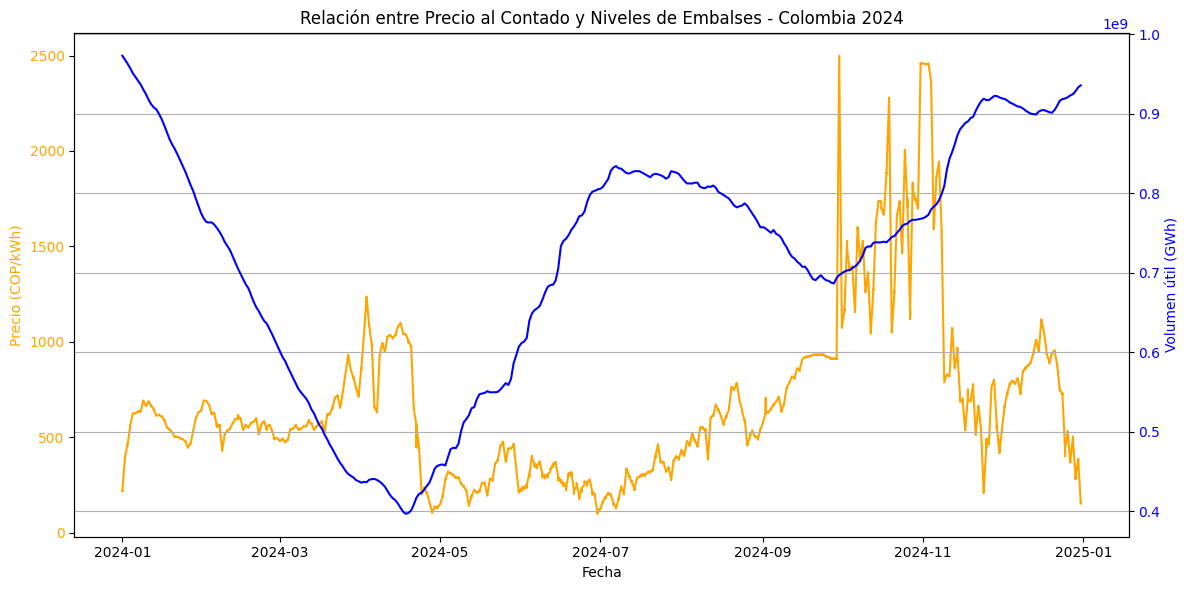

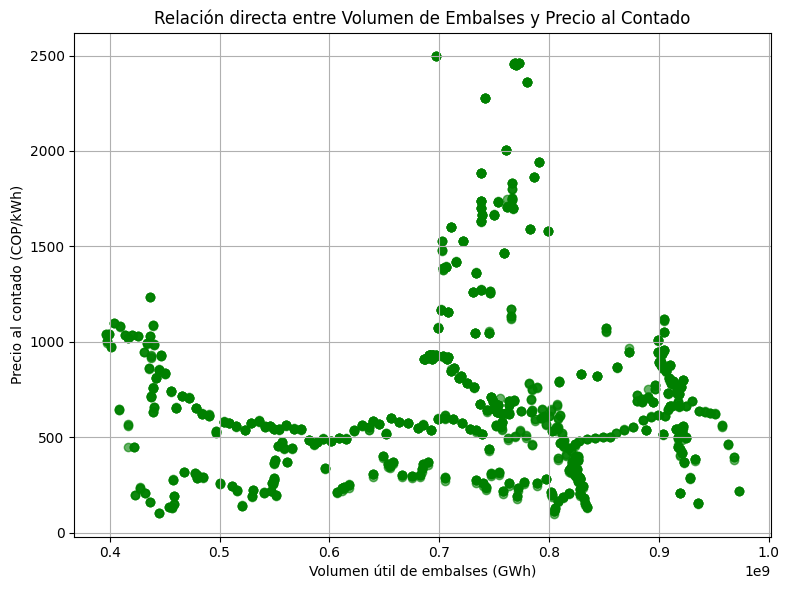

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataxm.pydatasimem import ReadSIMEM

# --- 1. Cargar dataset de embalses ---
dataset_id_embalses = 'B0E933'
fecha_inicio = '2024-01-01'
fecha_fin = '2024-12-31'

embalses = ReadSIMEM(dataset_id_embalses, fecha_inicio, fecha_fin)
data_embalses = embalses.main(filter=False)

# --- 2. Asegurar tipos de datos ---
data_embalses['Fecha'] = pd.to_datetime(data_embalses['Fecha'])
data['Fecha'] = pd.to_datetime(data['Fecha'])

# --- 3. Filtrar valores erróneos en precios ---
data_filtrada = data[(data['CodigoVariable'].isin(['PPBO', 'PPBOGReal'])) & (data['Valor'] < 7000)]

# --- 4. Calcular volumen útil promedio diario ---
embalses_diario = (
    data_embalses.groupby('Fecha')['VolumenUtilDiarioEnergia']
    .mean()
    .reset_index()
)

# --- 5. Filtrar precios PPBO (precio al contado) ---
precio_diario = data_filtrada[data_filtrada['CodigoVariable'] == 'PPBO'][['Fecha', 'Valor']]

# --- 6. Unir ambos datasets ---
relacion = pd.merge(precio_diario, embalses_diario, on='Fecha', how='inner')
relacion.rename(columns={'Valor': 'PrecioContado', 'VolumenUtilDiarioEnergia': 'VolumenEmbalse'}, inplace=True)

# --- 7. Graficar ---
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Relación entre Precio al Contado y Niveles de Embalses - Colombia 2024')
ax1.set_xlabel('Fecha')

# Precio (eje izquierdo)
ax1.plot(relacion['Fecha'], relacion['PrecioContado'], color='orange', label='Precio al contado (COP/kWh)')
ax1.set_ylabel('Precio (COP/kWh)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Embalses (eje derecho)
ax2 = ax1.twinx()
ax2.plot(relacion['Fecha'], relacion['VolumenEmbalse'], color='blue', label='Volumen útil de embalses (GWh)')
ax2.set_ylabel('Volumen útil (GWh)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.grid(True)
plt.tight_layout()
plt.show()

# --- 8. Gráfico de correlación ---
plt.figure(figsize=(8, 6))
plt.scatter(relacion['VolumenEmbalse'], relacion['PrecioContado'], color='green', alpha=0.6)
plt.title('Relación directa entre Volumen de Embalses y Precio al Contado')
plt.xlabel('Volumen útil de embalses (GWh)')
plt.ylabel('Precio al contado (COP/kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()



****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Reservas Hidráulicas en Energía"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0008094310760498047
Extraccion de registros: 60.572980880737305
End of data extracting process
****************************************************************************************************


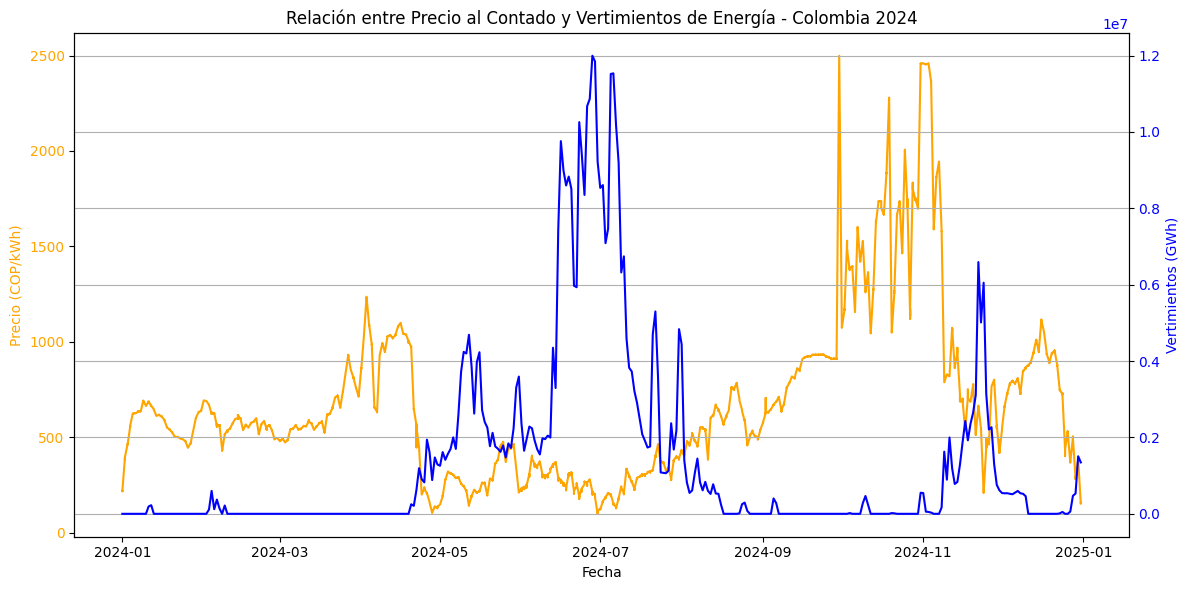

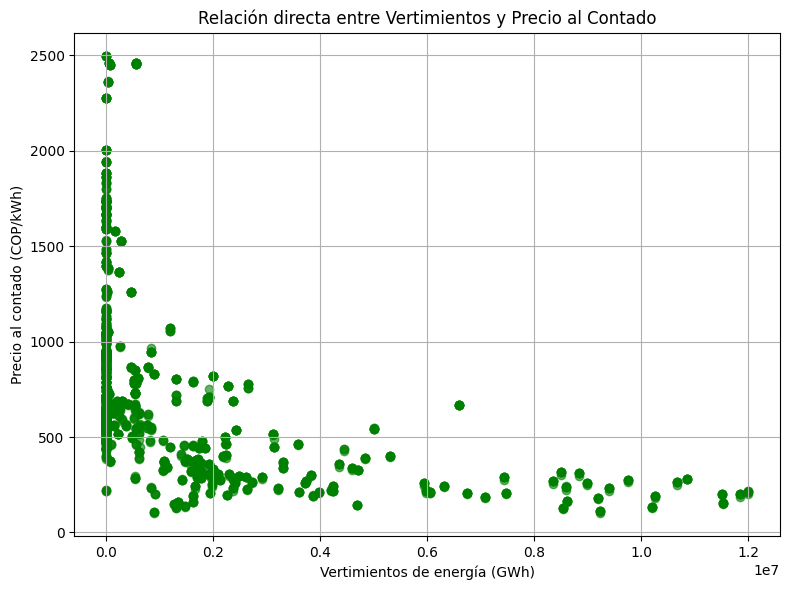

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataxm.pydatasimem import ReadSIMEM

# --- 1. Cargar dataset de precipitaciones/vertimientos ---
dataset_id_vertimientos = 'B0E933'
fecha_inicio = '2024-01-01'
fecha_fin = '2024-12-31'

vertimientos = ReadSIMEM(dataset_id_vertimientos, fecha_inicio, fecha_fin)
data_vert = vertimientos.main(filter=False)

# --- 2. Convertir fechas ---
data_vert['Fecha'] = pd.to_datetime(data_vert['Fecha'])
data['Fecha'] = pd.to_datetime(data['Fecha'])

# --- 3. Filtrar valores erróneos en precios (>7000) ---
data_filtrada = data[(data['CodigoVariable'].isin(['PPBO', 'PPBOGReal'])) & (data['Valor'] < 7000)]

# --- 4. Calcular vertimientos promedio diario ---
vertimientos_diario = (
    data_vert.groupby('Fecha')['VertimientosEnergia']
    .mean()
    .reset_index()
)

# --- 5. Filtrar precios PPBO (precio al contado) ---
precio_diario = data_filtrada[data_filtrada['CodigoVariable'] == 'PPBO'][['Fecha', 'Valor']]

# --- 6. Unir ambos datasets ---
relacion = pd.merge(precio_diario, vertimientos_diario, on='Fecha', how='inner')
relacion.rename(columns={'Valor': 'PrecioContado', 'VertimientosEnergia': 'Vertimientos'}, inplace=True)

# --- 7. Graficar evolución temporal ---
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_title('Relación entre Precio al Contado y Vertimientos de Energía - Colombia 2024')
ax1.set_xlabel('Fecha')

# Precio (eje izquierdo)
ax1.plot(relacion['Fecha'], relacion['PrecioContado'], color='orange', label='Precio al contado (COP/kWh)')
ax1.set_ylabel('Precio (COP/kWh)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Vertimientos (eje derecho)
ax2 = ax1.twinx()
ax2.plot(relacion['Fecha'], relacion['Vertimientos'], color='blue', label='Vertimientos (GWh)')
ax2.set_ylabel('Vertimientos (GWh)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.grid(True)
plt.tight_layout()
plt.show()

# --- 8. Graficar correlación directa ---
plt.figure(figsize=(8, 6))
plt.scatter(relacion['Vertimientos'], relacion['PrecioContado'], color='green', alpha=0.6)
plt.title('Relación directa entre Vertimientos y Precio al Contado')
plt.xlabel('Vertimientos de energía (GWh)')
plt.ylabel('Precio al contado (COP/kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
from pydataxm.pydatasimem import ReadSIMEM

# Fechas de análisis
fecha_inicio = '2025-01-01'
fecha_fin = '2025-11-05'

# IDs de los conjuntos de datos SIMEM
ids = {
    'precios': '96D56E',      # Precio ponderado de energía (PPBO / PPBOGReal)
    'embalses': 'B0E933',     # Volumen útil y vertimientos
    'demanda_real': '14fabb', # Demanda real
    'demanda_pron': '9e9ee7', # Pronóstico de demanda
    'aportes': '34FFDA'       # Aportes hídricos
}

# ------------------------------------------------------------
# 1. Descargar los datos desde SIMEM
# ------------------------------------------------------------
print("Descargando datos del SIMEM...")

precios = ReadSIMEM(ids['precios'], fecha_inicio, fecha_fin).main(filter=False)
embalses = ReadSIMEM(ids['embalses'], fecha_inicio, fecha_fin).main(filter=False)
demanda_real = ReadSIMEM(ids['demanda_real'], fecha_inicio, fecha_fin).main(filter=False)
demanda_pron = ReadSIMEM(ids['demanda_pron'], fecha_inicio, fecha_fin).main(filter=False)
aportes = ReadSIMEM(ids['aportes'], fecha_inicio, fecha_fin).main(filter=False)

print("Datos descargados correctamente.\n")

# ------------------------------------------------------------
# 2. Procesamiento y limpieza de cada conjunto
# ------------------------------------------------------------

# --- PRECIOS ---
precios['Fecha'] = pd.to_datetime(precios['Fecha'])
precios = precios.sort_values('Fecha')

# Eliminar valores atípicos del 30/09/2024 con valores >7000
precios = precios[~((precios['Fecha'] == '2025-09-30') & (precios['Valor'] > 7000))]

ppbogreal = precios[precios['CodigoVariable'] == 'PPBOGReal']
ppbo = precios[precios['CodigoVariable'] == 'PPBO']

# Promedio diario entre PPBOGReal y PPBO
precios_df = pd.merge(
    ppbogreal[['Fecha', 'Valor']], ppbo[['Fecha', 'Valor']],
    on='Fecha', suffixes=('_PPBOGReal', '_PPBO'), how='outer'
)
precios_df['PrecioCOP_kWh'] = precios_df[['Valor_PPBOGReal', 'Valor_PPBO']].mean(axis=1)
precios_df = precios_df[['Fecha', 'PrecioCOP_kWh']]

# --- EMBALSES ---
embalses['Fecha'] = pd.to_datetime(embalses['Fecha'])
embalses = embalses.groupby('Fecha', as_index=False)[['VolumenUtilDiarioEnergia', 'VertimientosEnergia']].mean()
embalses.rename(columns={
    'VolumenUtilDiarioEnergia': 'VolumenEmbalse',
    'VertimientosEnergia': 'Vertimientos'
}, inplace=True)

# --- DEMANDA REAL ---
demanda_real['Fecha'] = pd.to_datetime(demanda_real['FechaHora']).dt.date
demanda_real = demanda_real.groupby('Fecha', as_index=False)['Valor'].mean()
demanda_real.rename(columns={'Valor': 'DemandaReal'}, inplace=True)
demanda_real['Fecha'] = pd.to_datetime(demanda_real['Fecha'])

# --- PRONÓSTICO DE DEMANDA ---
demanda_pron['Fecha'] = pd.to_datetime(demanda_pron['Fecha'])
demanda_pron = demanda_pron.groupby('Fecha', as_index=False)['PronDem'].mean()
demanda_pron.rename(columns={'PronDem': 'DemandaPron'}, inplace=True)

# --- APORTES HÍDRICOS ---
aportes['Fecha'] = pd.to_datetime(aportes['Fecha'])
aportes = aportes.groupby('Fecha', as_index=False)['AportesHidricosPorcentaje'].mean()

# 3. Fusionar todos los conjuntos en un solo DataFrame

df = precios_df.merge(embalses, on='Fecha', how='left') \
               .merge(demanda_real, on='Fecha', how='left') \
               .merge(demanda_pron, on='Fecha', how='left') \
               .merge(aportes, on='Fecha', how='left')

# Asegurar tipo de fecha uniforme
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')


# 4. Variables temporales adicionales

df['Mes'] = df['Fecha'].dt.month
df['DiaSemana'] = df['Fecha'].dt.dayofweek
df = df.dropna().sort_values('Fecha')

print(f"DataFrame final listo: {df.shape[0]} registros, {df.shape[1]} columnas")
print(df.head())



Descargando datos del SIMEM...
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precio de bolsa ponderado"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0010101795196533203
Extraccion de registros: 57.76780390739441
End of data extracting process
****************************************************************************************************
****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Reservas Hidráulicas en Energía"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0007958412170410156
Extraccion de registros: 54.94564390182495
End of data extract

Evaluación del modelo (con datos diarios):
MAE:  41.33 COP/kWh
RMSE: 54.64 COP/kWh
R²:   0.689


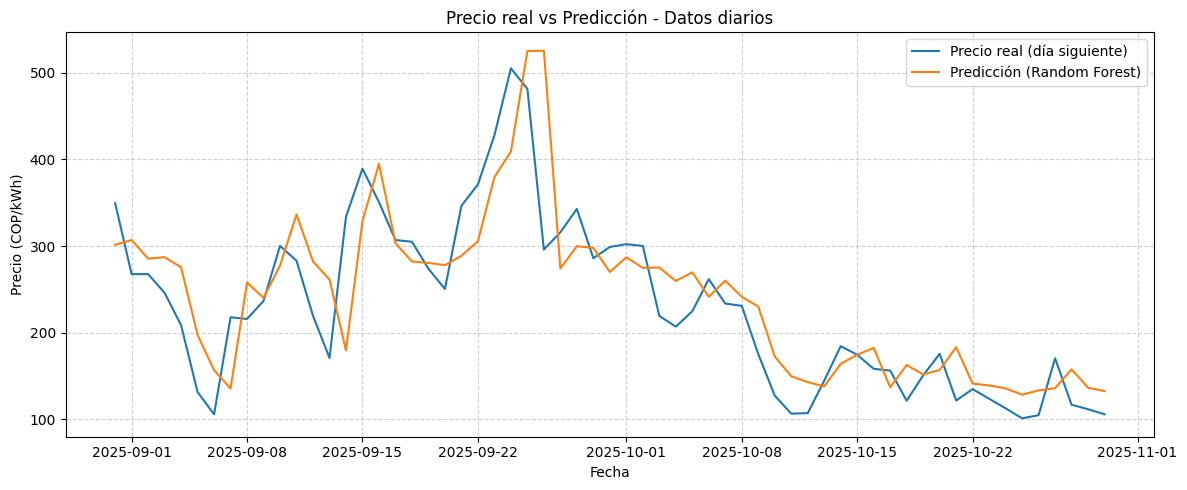

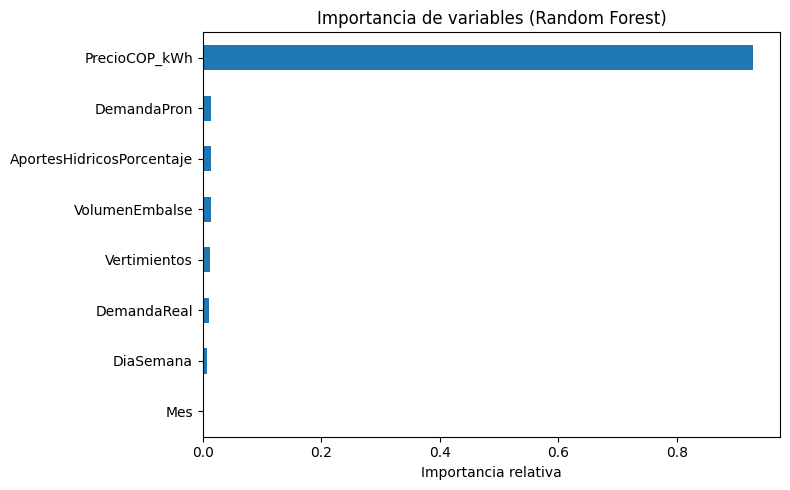


Primeras 10 filas de comparación (test):
     Fecha  PrecioReal  Predicción
2025-08-31  349.482975  301.485736
2025-09-01  267.623346  306.950226
2025-09-02  267.651717  285.456920
2025-09-03  246.109842  287.160273
2025-09-04  208.650313  275.540833
2025-09-05  131.647096  197.461009
2025-09-06  105.851812  156.783807
2025-09-07  217.861033  135.619737
2025-09-08  215.910150  257.924916
2025-09-09  236.720225  240.193988


In [40]:
# Celda: Entrenamiento y predicción con scikit-learn (Random Forest)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1) Preparar DataFrame diario
df['Fecha'] = pd.to_datetime(df['Fecha'])
df_diario = df.groupby('Fecha', as_index=False).mean()

# --- 2) Crear la variable objetivo: precio del día siguiente ---
df_diario = df_diario.sort_values('Fecha').reset_index(drop=True)
df_diario['PrecioFuturo'] = df_diario['PrecioCOP_kWh'].shift(-1)

# Eliminar la última fila (no tiene target) y cualquier fila con NA
df_model = df_diario.dropna().reset_index(drop=True)

# --- 3) Selección de variables (features) ---
features = [
    'PrecioCOP_kWh',        # precio histórico
    'VolumenEmbalse',
    'Vertimientos',
    'DemandaReal',
    'DemandaPron',
    'AportesHidricosPorcentaje',
    'Mes',
    'DiaSemana'
]
target = 'PrecioFuturo'

# Asegurarse de que las columnas existan
missing_feats = [f for f in features if f not in df_model.columns]
if missing_feats:
    raise KeyError(f"Faltan columnas requeridas en el DataFrame: {missing_feats}")

X = df_model[features]
y = df_model[target]

# --- 4) Separar entrenamiento ---
split_idx = int(len(df_model) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = df_model['Fecha'].iloc[split_idx:].reset_index(drop=True)

# --- 5) Entrenar Random Forest ---
modelo = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
modelo.fit(X_train, y_train)

# --- 6) Predicción ---
y_pred = modelo.predict(X_test)

# --- 7) Métricas de evaluación ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo (con datos diarios):")
print(f"MAE:  {mae:.2f} COP/kWh")
print(f"RMSE: {rmse:.2f} COP/kWh")
print(f"R²:   {r2:.3f}")

# --- 8) Gráfica: Precio real vs Predicción (serie temporal) ---
plt.figure(figsize=(12,5))
plt.plot(dates_test, y_test.values, label='Precio real (día siguiente)', linewidth=1.5)
plt.plot(dates_test, y_pred, label='Predicción (Random Forest)', linewidth=1.5)
plt.title('Precio real vs Predicción - Datos diarios')
plt.xlabel('Fecha')
plt.ylabel('Precio (COP/kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 9) Gráfica: Importancia de variables ---
importances = pd.Series(modelo.feature_importances_, index=features)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,5))
importances.plot(kind='barh')
plt.title('Importancia de variables (Random Forest)')
plt.xlabel('Importancia relativa')
plt.tight_layout()
plt.show()

# --- 10) Comparar numéricamente primeros N resultados ---
comp = pd.DataFrame({
    'Fecha': dates_test.reset_index(drop=True),
    'PrecioReal': y_test.reset_index(drop=True),
    'Predicción': y_pred
})
print("\nPrimeras 10 filas de comparación (test):")
print(comp.head(10).to_string(index=False))


Evaluación del modelo:
MAE:  32.52 COP/kWh
RMSE: 44.60 COP/kWh
R²:   0.793


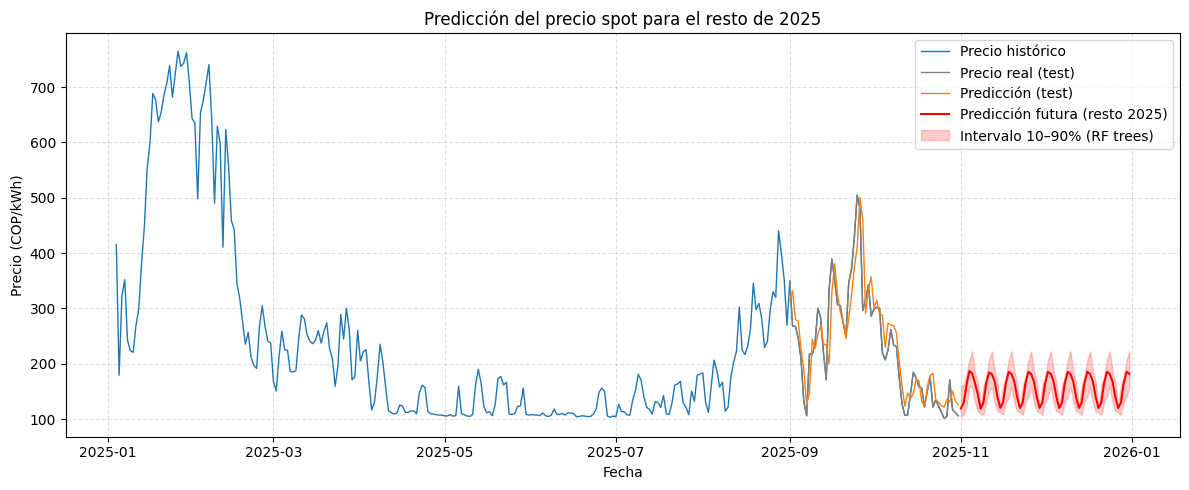


Primeras 10 predicciones (futuro):
     Fecha  Prediccion      Low10     High90
2025-11-01  119.375810 104.568265 159.788200
2025-11-02  130.012995 107.675230 161.895360
2025-11-03  162.381123 123.093870 181.231705
2025-11-04  186.729407 159.788200 206.515005
2025-11-05  182.565050 158.137567 222.496148
2025-11-06  164.630887 130.100758 183.374498
2025-11-07  144.772396 114.298245 168.157715
2025-11-08  118.667493 108.830603 121.277248
2025-11-09  129.543313 107.853613 159.788200
2025-11-10  165.410846 130.141743 176.061332


In [41]:
# Predicción
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Comprueba que 'df' existe y contiene lo mínimo
if 'df' not in globals():
    raise RuntimeError("No existe el DataFrame 'df' en el entorno. Carga antes los datos y vuelve a ejecutar.")

# Preparación básica: agrupación diaria y orden
df['Fecha'] = pd.to_datetime(df['Fecha'])
df_diario = df.groupby('Fecha', as_index=False).mean().sort_values('Fecha').reset_index(drop=True)

# Comprobar columna objetivo
if 'PrecioCOP_kWh' not in df_diario.columns:
    raise KeyError("Falta la columna 'PrecioCOP_kWh' en el DataFrame. Asegúrate de haberla creado.")

# Crear retardos (lags) simples del precio: 1, 2 y 3 días
df_diario['lag1'] = df_diario['PrecioCOP_kWh'].shift(1)
df_diario['lag2'] = df_diario['PrecioCOP_kWh'].shift(2)
df_diario['lag3'] = df_diario['PrecioCOP_kWh'].shift(3)

# Variables temporales
df_diario['Mes'] = df_diario['Fecha'].dt.month
df_diario['DiaSemana'] = df_diario['Fecha'].dt.dayofweek

# Eliminar filas iniciales con NaN por los lags
df_model = df_diario.dropna().reset_index(drop=True)

# Definir features y target
features = ['lag1', 'lag2', 'lag3', 'Mes', 'DiaSemana']
target = 'PrecioCOP_kWh'

# Asegurar que las columnas de features existen
features = [f for f in features if f in df_model.columns]
if len(features) < 3:
    raise RuntimeError("No hay suficientes features disponibles para entrenar. Revisa el DataFrame.")

X = df_model[features]
y = df_model[target]

# División temporal: 80% train, 20% test
split_idx = int(len(df_model) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = df_model['Fecha'].iloc[split_idx:].reset_index(drop=True)

# Entrenar Random Forest (parámetros simples y robustos)
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predicción en test y métricas
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo:")
print(f"MAE:  {mae:.2f} COP/kWh")
print(f"RMSE: {rmse:.2f} COP/kWh")
print(f"R²:   {r2:.3f}")

# Predicción recursiva para el resto de 2025
ultimo_fecha = df_model['Fecha'].max()
futuras = pd.date_range(start=ultimo_fecha + pd.Timedelta(days=1), end='2025-12-31', freq='D')
n_fut = len(futuras)
# Tomar los últimos 3 precios conocidos como semilla
seed_prices = list(df_model['PrecioCOP_kWh'].values[-3:])

preds = []
preds_low = []
preds_high = []

for fecha in futuras:
    mes = fecha.month
    diasem = fecha.dayofweek
    x = np.array([[seed_prices[-1], seed_prices[-2], seed_prices[-3], mes, diasem]])
    # Predecir punto central
    p = model.predict(x)[0]
    preds.append(p)
    # Obtener predicciones de cada árbol para intervalo
    all_tree_preds = np.array([est.predict(x)[0] for est in model.estimators_])
    preds_low.append(np.percentile(all_tree_preds, 10))
    preds_high.append(np.percentile(all_tree_preds, 90))
    # actualizar seed_prices recursivamente
    seed_prices.append(p)
    seed_prices.pop(0)

# Graficar histórico + test + predicción futura con banda de incertidumbre
plt.figure(figsize=(12,5))
# Histórico completo
plt.plot(df_model['Fecha'], df_model['PrecioCOP_kWh'], label='Precio histórico', color='tab:blue', linewidth=1)
# Test vs predicho (última parte)
plt.plot(dates_test, y_test.values, label='Precio real (test)', color='tab:gray', linewidth=1)
plt.plot(dates_test, y_pred, label='Predicción (test)', color='tab:orange', linewidth=1)
# Predicción futura
plt.plot(futuras, preds, label='Predicción futura (resto 2025)', color='red', linewidth=1.5)
# Banda de incertidumbre
plt.fill_between(futuras, preds_low, preds_high, color='red', alpha=0.2, label='Intervalo 10–90% (RF trees)')
plt.title('Predicción del precio spot para el resto de 2025')
plt.xlabel('Fecha')
plt.ylabel('Precio (COP/kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Mostrar primeras predicciones futuras
df_pred_fut = pd.DataFrame({
    'Fecha': futuras,
    'Prediccion': preds,
    'Low10': preds_low,
    'High90': preds_high
})
print("\nPrimeras 10 predicciones (futuro):")
print(df_pred_fut.head(10).to_string(index=False))
